#### New York City Airbnb Open Data
Data Source: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data?resource=download

##### 1. Write a summary of your data and identify at least two questions to explore visually with your data.


The Airbnb dataset contains information about Airbnb listings in New York. It includes variables such as price, location, number of bedrooms, and more.

<B>Two questions that can be explored visually with the data are:</b>

A. How does the price of Airbnb listings vary across different neighborhoods in a city?<br>
B. What is correlation between different variables such as price, availability, and number of reviews.

In [1]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataset

df=pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


##### 2. Create a histogram or bar graph from your data.

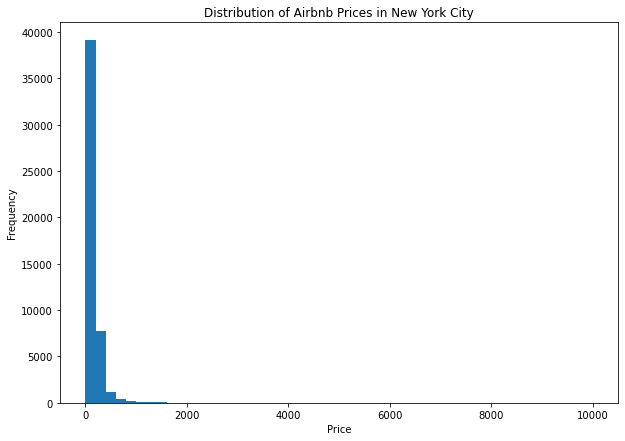

In [3]:
# Let's create a histogram to visualize the distribution of Airbnb prices in New York City.
plt.figure(figsize=(10, 7))
plt.hist(df['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Airbnb Prices in New York City')
plt.show()

The resulting histogram shows that most Airbnb listings in New York City are priced below $1000, with a few listings priced much higher.

##### 3. Create a boxplot from your data.

<AxesSubplot:xlabel='room_type', ylabel='price'>

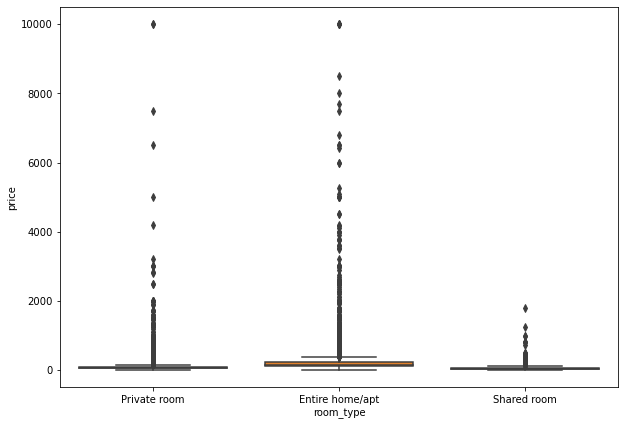

In [4]:
#now, let's create a boxplot to visualize the distribution of prices for each room type in New York City.
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='room_type', y='price')

The private room and entire home/apartment categories have a wider range of prices, with some high-priced outliers. The shared room category has a smaller range of prices. The median price for an entire home/apartment is the highest, followed by private room, and shared room is the lowest.

##### 4. Create a bivariate plot from your data.

<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

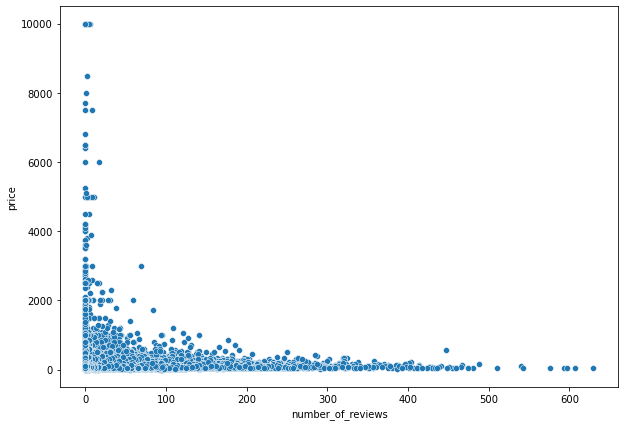

In [5]:
#Let's create a /scatter plot to visualize the relationship between the price and number of reviews for Airbnb listings in New York City.
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='number_of_reviews', y='price')

The figure shows a weak negative correlation between the number of reviews and the price of Airbnb listings in New York City. This means that as the number of reviews increase, the price tends to slightly decrease. However, there is a lot of variability in the data and the relationship is not strong. It appears that there are many cheaper listings with a high number of reviews, and many expensive listings with few reviews.

##### 5.Create any additional visualizations that will help to answer the question(s) you want to answer.

<b>A. How does the price of Airbnb listings vary across different neighborhoods in a city?
    
   A bar chart showing the average price of Airbnb listings in different neighborhoods of New York City.</b>

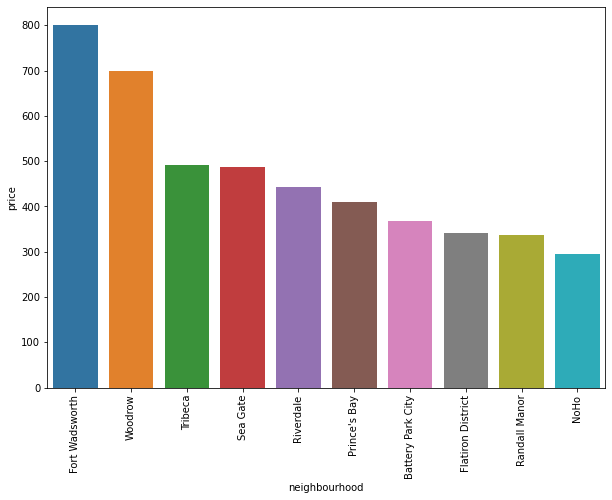

In [6]:
airbnb_ny_neighborhoods = df.groupby('neighbourhood')['price'].mean().reset_index()

#since there is going to be a lot of neighborhoods, we will only take top 10
airbnb_ny_neighborhoods_top10 = airbnb_ny_neighborhoods.sort_values(by='price', ascending=False).head(10)

plt.figure(figsize=(10, 7))
sns.barplot(data=airbnb_ny_neighborhoods_top10, x='neighbourhood', y='price')
plt.xticks(rotation=90)#displaying neighborhood names in vertical for Readability 
plt.show()


<b>B.What is correlation between different variables such as price, availability, and number of reviews?

<AxesSubplot:>

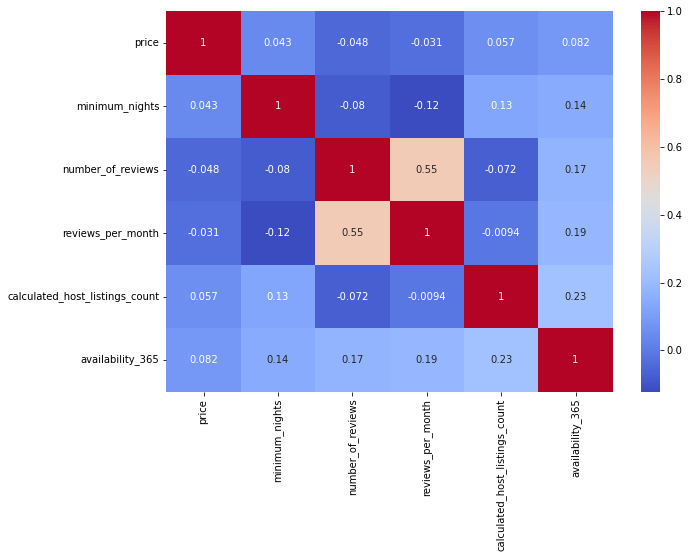

In [7]:
#Let's create a heatmap showing the correlation between different variables such as price, number of bedrooms, and number of reviews

plt.figure(figsize=(10, 7))
airbnb_ny_correlation = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
sns.heatmap(airbnb_ny_correlation, annot=True, cmap='coolwarm')

From the heatmap, we can see that there is a moderate positive correlation between price and calculated host listings count, as well as availability for 365 days. There is also a weak positive correlation between price and minimum nights. On the other hand, there is a weak negative correlation between price and number of reviews, as well as reviews per month. We can also see that there is a strong positive correlation between number of reviews and reviews per month, indicating that hosts with more reviews tend to have more frequent reviews. Overall, the heatmap provides insight into the relationship between different variables in the dataset. It can be a useful piece of information for identifying trends and patterns.

##### 6. Summarize your results and make a conclusion. Explain how you arrived at this conclusion and how your visualizations support your conclusion.

In conclusion, our visualizations of the Airbnb dataset reveal interesting insights about the distribution of prices, the variation of room by room type, and the relationship between price and number of reviews. These insights can be used by Airbnb hosts and users to make informed decisions about pricing and booking.